# Hyperparameters

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [2]:
torch.set_num_threads(1)
cwd = os.getcwd()

## Tensorize fffc_tiny for different hyperparameters

### embed_dim

In [3]:
embedding_fn = 'poly',
# embed_dim = 2
bond_dim = 5
domain_multiplier = 1
n_samples = 50

embed_dim_lst = [2, 3, 4, 5, 6]

models_dir = os.path.join(cwd, '..', '..', 'results', '2_hyperparameters')

embed_dim_quantiles_lst = []
for embed_dim in embed_dim_lst:
    cores_dir = os.path.join(
        models_dir,
        'cores_fffc_tiny',
        f'{embed_dim}_{bond_dim}_{domain_multiplier}_{n_samples}')
    
    cores_lst = os.listdir(cores_dir)
    
    quantiles = []
    for file in cores_lst:
        quantiles.append(float(file.split('_')[1]))
    
    quantiles = torch.tensor(quantiles)
    embed_dim_quantiles_lst.append(quantiles)

embed_dim_quantiles = torch.stack(embed_dim_quantiles_lst, dim=1)

### bond_dim

In [4]:
embedding_fn = 'poly',
embed_dim = 2
# bond_dim = 5
domain_multiplier = 1
n_samples = 50

bond_dim_lst = [2, 5, 10, 20, 50]

models_dir = os.path.join(cwd, '..', '..', 'results', '2_hyperparameters')

bond_dim_quantiles_lst = []
for bond_dim in bond_dim_lst:
    cores_dir = os.path.join(
        models_dir,
        'cores_fffc_tiny',
        f'{embed_dim}_{bond_dim}_{domain_multiplier}_{n_samples}')
    
    cores_lst = os.listdir(cores_dir)
    
    quantiles = []
    for file in cores_lst:
        quantiles.append(float(file.split('_')[1]))
    
    quantiles = torch.tensor(quantiles)
    bond_dim_quantiles_lst.append(quantiles)

bond_dim_quantiles = torch.stack(bond_dim_quantiles_lst, dim=1)

### domain_multiplier

In [ ]:
embedding_fn = 'poly',
embed_dim = 2
bond_dim = 5
# domain_multiplier = 1
n_samples = 50

domain_multiplier_lst = [1, 2, 3, 4, 5]

models_dir = os.path.join(cwd, '..', '..', 'results', '2_hyperparameters')

domain_multiplier_quantiles_lst = []
for domain_multiplier in domain_multiplier_lst:
    cores_dir = os.path.join(
        models_dir,
        'cores_fffc_tiny',
        f'{embed_dim}_{bond_dim}_{domain_multiplier}_{n_samples}')
    
    cores_lst = os.listdir(cores_dir)
    
    quantiles = []
    for file in cores_lst:
        quantiles.append(float(file.split('_')[1]))
    
    quantiles = torch.tensor(quantiles)
    domain_multiplier_quantiles_lst.append(quantiles)

domain_multiplier_quantiles = torch.stack(domain_multiplier_quantiles_lst, dim=1)

### n_samples

In [5]:
embedding_fn = 'poly',
embed_dim = 2
bond_dim = 5
domain_multiplier = 1
# n_samples = 50

n_samples_lst = [10, 20, 50, 100, 200]

models_dir = os.path.join(cwd, '..', '..', 'results', '2_hyperparameters')

n_samples_quantiles_lst = []
for n_samples in n_samples_lst:
    cores_dir = os.path.join(
        models_dir,
        'cores_fffc_tiny',
        f'{embed_dim}_{bond_dim}_{domain_multiplier}_{n_samples}')
    
    cores_lst = os.listdir(cores_dir)
    
    quantiles = []
    for file in cores_lst:
        quantiles.append(float(file.split('_')[1]))
    
    quantiles = torch.tensor(quantiles)
    n_samples_quantiles_lst.append(quantiles)

n_samples_quantiles = torch.stack(n_samples_quantiles_lst, dim=1)

### Figure

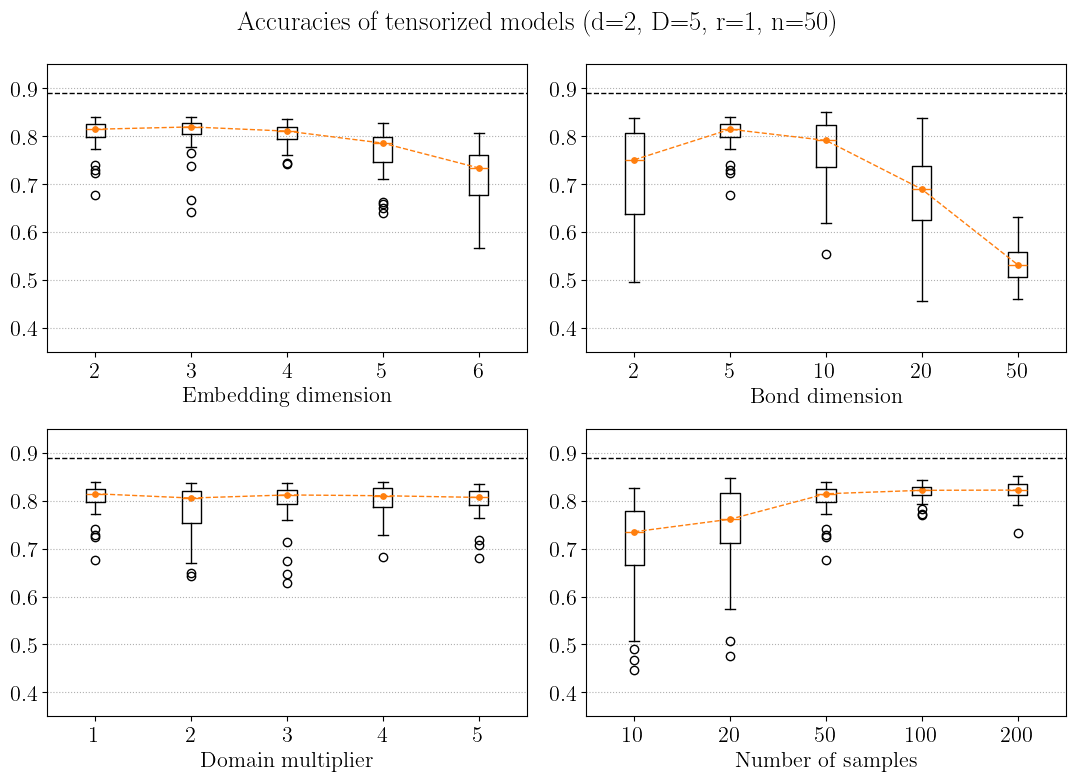

In [20]:
all_lst = [embed_dim_lst,
           bond_dim_lst,
           domain_multiplier_lst,
           n_samples_lst]
all_quantiles = [embed_dim_quantiles,
                 bond_dim_quantiles,
                 domain_multiplier_quantiles,
                 n_samples_quantiles]
titles = ['Embedding dimension',
          'Bond dimension',
          'Domain multiplier',
          'Number of samples']

models_dir = os.path.join(cwd, '..', '..', 'results', '2_hyperparameters')
model_file = list(filter(lambda f: f.startswith('fffc_tiny') and f.endswith('.pt'),
                         os.listdir(models_dir)))[0]
model_acc = float(model_file.split('_')[-1][:-3])


# plt.rc('font', family='serif', size=15)
plt.rc('font', family='serif', serif='Computer Modern', size=16)
plt.rc('text', usetex=True)

colormap = plt.get_cmap("tab10")
color = colormap(0)

fig, axs = plt.subplots(2, 2, figsize=(11, 8))


for i, (ax, x, quantiles, title) in enumerate(zip(axs.flatten(),
                                                  all_lst,
                                                  all_quantiles,
                                                  titles)):
    
    bp = ax.boxplot(x=quantiles, positions=range(quantiles.shape[1]),
                    widths=0.2, tick_labels=x)
    
    medians = []
    for medline in bp['medians']:
        medians.append(medline.get_ydata()[0])
    
    ax.plot(range(quantiles.shape[1]), medians, linestyle='--', linewidth=1.,
            color='tab:orange')
    ax.scatter(x=range(quantiles.shape[1]), y=medians, marker='o', s=15.,
               color='tab:orange')
    
    
    ax.axhline(y=model_acc, linestyle='--', linewidth=1., color='black')
    
    # Set axes
    ax.set_ylim(0.35, 0.95)
    ax.yaxis.grid(linestyle=':')
    
    # Adding labels and title
    ax.set_xlabel(title)


fig.suptitle('Accuracies of tensorized models (d=2, D=5, r=1, n=50)')

plt.tight_layout(pad=1.)
plt.show()

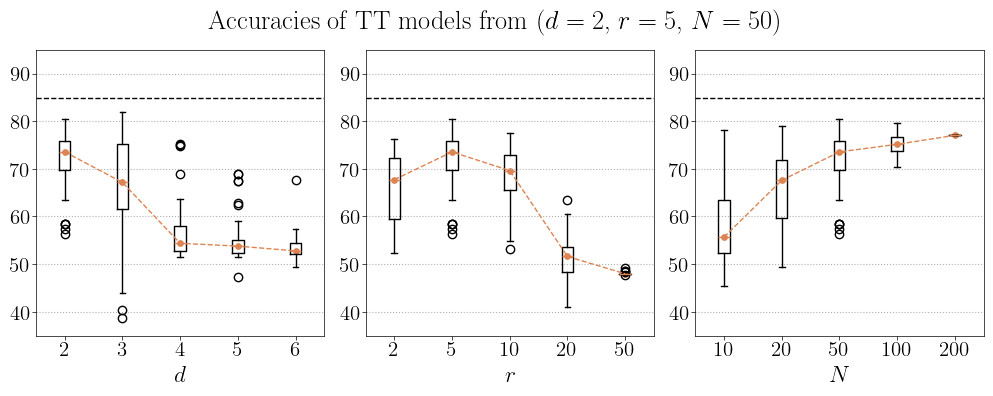

In [7]:
all_lst = [embed_dim_lst,
           bond_dim_lst,
           n_samples_lst]
all_quantiles = [embed_dim_quantiles,
                 bond_dim_quantiles,
                 n_samples_quantiles]
titles = [r'$d$',
          r'$r$',
          r'$N$']

models_dir = os.path.join(cwd, '..', '..', 'results', '2_hyperparameters')
model_file = list(filter(lambda f: f.startswith('fffc_tiny') and f.endswith('.pt'),
                         os.listdir(models_dir)))[0]
model_acc = float(model_file.split('_')[-1][:-3])


palette = sns.color_palette("deep")
color = palette[1]

plt.rc('font', family='serif', serif='Computer Modern', size=16)
plt.rc('text', usetex=True)


# Set global font sizes
plt.rcParams['axes.linewidth'] = 0.5  # Default is usually 1.0
plt.rcParams['figure.titlesize'] = 19  # Set global suptitle font size
plt.rcParams['axes.titlesize'] = 19  # Title font size
plt.rcParams['axes.labelsize'] = 17  # Axis label font size
plt.rcParams['xtick.labelsize'] = 15  # X-axis tick label font size
plt.rcParams['ytick.labelsize'] = 15  # Y-axis tick label font size
plt.rcParams['legend.fontsize'] = 15


fig, axs = plt.subplots(1, 3, figsize=(10, 4))


for i, (ax, x, quantiles, title) in enumerate(zip(axs.flatten(),
                                                  all_lst,
                                                  all_quantiles,
                                                  titles)):
    
    bp = ax.boxplot(x=100*quantiles, positions=range(quantiles.shape[1]),
                    widths=0.2, tick_labels=x, medianprops={'color': color})
    
    medians = []
    for medline in bp['medians']:
        medians.append(medline.get_ydata()[0])
    
    ax.plot(range(quantiles.shape[1]), medians, linestyle='--', linewidth=1.,
            color=color)
    ax.scatter(x=range(quantiles.shape[1]), y=medians, marker='o', s=15.,
               color=color)
    
    
    ax.axhline(y=100*model_acc, linestyle='--', linewidth=1., color='black')
    
    # Set axes
    ax.set_ylim(100*0.35, 100*0.95)
    ax.yaxis.grid(linestyle=':')
    
    # Adding labels and title
    ax.set_xlabel(title)


fig.suptitle(r'Accuracies of TT models from ($d=2$, $r=5$, $N=50$)')

plt.tight_layout(pad=0.5)

for i in range(3):
    axs[i].tick_params(axis='both', which='major', pad=1,
                       direction='out', length=3, width=0.5)  # Default is usually around 6-10
    axs[i].tick_params(axis='both', which='minor', pad=1,
                       direction='out', length=3, width=0.5)

models_dir = os.path.join(cwd, '..', '..', 'results', '2_hyperparameters')
plt.savefig(os.path.join(models_dir, 'hyperparameters.pdf'), bbox_inches='tight')

plt.show()